<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/ImportRawData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sinfo

     |████████████████████████████████| 71kB 6.4MB/s 
  Created wheel for sinfo: filename=sinfo-0.3.1-cp36-none-any.whl size=7018 sha256=3aa283a177622d71bec620660808862a790f7c6133e5286dedeabedf49d3d0bd
  Stored in directory: /root/.cache/pip/wheels/11/f0/23/347d6d8e59787c2bc272162d18223dc3b45bd6dc40aceee6af
Successfully built sinfo


###Import git module

In [2]:
! git clone https://github.com/taile2007/Biosignal-analysis.git

Cloning into 'Biosignal-analysis'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 150 (delta 69), reused 17 (delta 5), pack-reused 0
Receiving objects: 100% (150/150), 6.48 MiB | 9.82 MiB/s, done.
Resolving deltas: 100% (69/69), done.


In [3]:
pwd

'/content'

In [4]:
%cd Biosignal-analysis/Data\ wrangling-01-Importation

/content/Biosignal-analysis/Data wrangling-01-Importation


In [8]:
import os
import sys
import re
import numpy as np
import pandas as pd
from module1.raw_data_parser import *

In [81]:
pwd

'/content/Biosignal-analysis/Data wrangling-01-Importation'

In [9]:
from sinfo import sinfo
sinfo()

-----
module1     0.1
numpy       1.19.4
pandas      1.1.5
pytz        2018.9
sinfo       0.3.1
tqdm        4.41.1
-----
IPython             5.5.0
jupyter_client      5.3.5
jupyter_core        4.7.0
notebook            5.3.1
-----
Python 3.6.9 (default, Oct  8 2020, 12:12:24) [GCC 8.4.0]
Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
2 logical CPU cores, x86_64
-----
Session information updated at 2021-01-11 15:55


In [10]:
PACK_FOLDER = '/content/drive/MyDrive/Dataset/Packs'

In [11]:
pack = Paths_Info_Summary(PACK_FOLDER)


In [12]:
pack.data_folder

'/content/drive/MyDrive/Dataset/Packs'

## Liệt kê cây thư mục của gói Packs

In [13]:
pack.print_directory_tree(pack.data_folder)

|__Packs/
    |__fileId=1NqZJd4jsfNFQUZHQC4O6h2uqR53dcCpZ-requirements.txt
   |__Res_signal_samp/
        |__Profile.txt
      |__Raw data/
            |__Abd RIP.txt
            |__Avg AP.txt
            |__Dia AP.txt
            |__ECG.txt
            |__EMG1.txt
            |__EMG2.txt
            |__EMG3.txt
            |__EMG4.txt
            |__EMG5.txt
            |__EMG6.txt
            |__Flow Pressure.txt
            |__Flow Th.txt
            |__Microphone.txt
            |__HMM.txt
            |__VMM.txt
            |__OESP.txt
            |__Pleth Flowrate.txt
            |__PLMl.txt
            |__PLMr.txt
            |__Pulse.txt
            |__Snoring P.txt
            |__SpO2.txt
            |__Sys AP.txt
            |__Tx RIP.txt
      |__Scoring sequences/
            |__Respiratory events.txt
            |__SpO2.txt
            |__Desaturations.txt
            |__Micro Arousals.txt
            |__Hypnogramme.txt


##Gán dataframe cho 1 object tên là pinfo

In [14]:
pinfo = pack.create_signal_summary()

pinfo.head()

,full_paths,pack,filename,signal_type,Size (Mb)
0,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Abd RIP.txt,abd rip,3.304411
1,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Avg AP.txt,avg ap,4.410931
2,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Dia AP.txt,dia ap,4.401841
3,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,ECG.txt,ecg,67.016486
4,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG1.txt,emg1,48.448591


In [13]:
len(pinfo.signal_type.unique())

31

### Số lượng kiểu dữ liệu trong gói

In [49]:
len(pinfo.signal_type.unique())

31

### Kiểu tín hiệu trong gói

In [15]:
print(pinfo.signal_type.values)

['abd rip' 'avg ap' 'dia ap' 'ecg' 'emg1' 'emg2' 'emg3' 'emg4' 'emg5'
 'emg6' 'flow pressure' 'flow th' 'microphone' 'hmm' 'vmm' 'oesp'
 'pleth flowrate' 'plml' 'plmr' 'pulse' 'snoring p' 'spo2' 'sys ap'
 'tx rip' 'respi_evt' 'raw_spo2' 'evt_spo2' 'ma' 'hypno' 'profile'
 'fileid=1nqzjd4jsfnfquzhqc4o6h2uqr53dccpz-requirements']


### Mô tả thông tin dữ liệu

In [16]:
pinfo["Size (Mb)"].describe()

count    31.000000
mean     19.025112
std      21.302178
min       0.000046
25%       3.368794
50%       6.283715
75%      46.365494
max      67.016486
Name: Size (Mb), dtype: float64

# DataImporter class

* Sử dụng pandas thay vì numpy để xác định thời gian (thời điểm, thời lượng)
* Dùng OOP (Class) dùng mỗi instance là một thực thể riêng

In [17]:
case = DataImporter(signal_summary = pinfo, 
                    data_path = PACK_FOLDER,
                    pack_folder= 'Res_signal_samp')

case

Đây là data paser cho pack dữ liệu Res_signal_samp

Thông tin về Import_pack_profile

In [18]:
help(case.Import_pack_profile)

Help on method Import_pack_profile in module module1.raw_data_parser:

Import_pack_profile() method of module1.raw_data_parser.DataImporter instance
    Hàm truy xuất thông tin bệnh nhân:
    Đọc file Profile.txt và tạo ra 1 dict gồm Giới tính, chiều cao, 
    cân nặng, BMI cho bệnh nhân.



In [19]:
patient_info = case.Import_pack_profile()

patient_info

{'Chiều cao': 176.0, 'Cân nặng': 84.0, 'Giới tính': 'F', 'Tuổi': 36.32}

In [20]:
%cd '/content/drive/MyDrive/Dataset/Packs/'

/content/drive/MyDrive/Dataset/Packs


In [ ]:
pwd

'/content/drive/My Drive/Dataset/Packs'

# Dữ liệu chuỗi

In [21]:
case = DataImporter(signal_summary = pinfo, 
                    data_path = PACK_FOLDER,
                    pack_folder= 'Res_signal_samp')

case

Đây là data paser cho pack dữ liệu Res_signal_samp

In [22]:
help(case.import_raw_data)

Help on method import_raw_data in module module1.raw_data_parser:

import_raw_data(signal_type:str, n_lines=None, samp_freq=None) method of module1.raw_data_parser.DataImporter instance
    Hàm cho phép tải bất kì dữ liệu nào thuộc loại 1 (raw data), 
    áp dụng tổng quát cho tất cả raw data
    
    :signal_type: tên viết tắt của loại dữ liệu, chú ý: luôn là chữ thường
    :n_lines: số nguyên, giới hạn số hàng cần tải, thấp nhất là 5;
    
    Ghi chú: 
    1) Nếu n_lines = None, hàm sẽ xuất ra 3 kết quả:
    :return 1: df_data, tín hiệu gốc, 
               pd.Series liên tục, có datetime index
    :return 2: df_resampled, tín hiệu tái chọn mẫu; 
               pd.Series liên tục, có datetime index
    :return 3: fs, giá trị tần số lấy mẫu gốc, int
    
    2) Nếu n_lines = 5, hàm chỉ xuất ra 2 kết quả:
    :return 1: pd.Series gồm 2 hàng: thới điểm bắt đầu và kết thúc xét nghiệm
    :return 2: fs: giá trị tần số lấy mẫu gốc, int
    
    3) Nếu không tìm thấy đường dẫn của loại tín

Tra bảng kiểu tín hiệu có thể lựa chọn

In [23]:
print(pinfo.signal_type.values)

['abd rip' 'avg ap' 'dia ap' 'ecg' 'emg1' 'emg2' 'emg3' 'emg4' 'emg5'
 'emg6' 'flow pressure' 'flow th' 'microphone' 'hmm' 'vmm' 'oesp'
 'pleth flowrate' 'plml' 'plmr' 'pulse' 'snoring p' 'spo2' 'sys ap'
 'tx rip' 'respi_evt' 'raw_spo2' 'evt_spo2' 'ma' 'hypno' 'profile'
 'fileid=1nqzjd4jsfnfquzhqc4o6h2uqr53dccpz-requirements']


In [24]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='some strange type', 
                                                   samp_freq=None)

Không tìm thấy data cho tín hiệu  some strange type ở bệnh nhân này !


In [45]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='ecg', 
                                                   samp_freq=None)

UnicodeDecodeError: ignored

In [37]:
fs

32

In [38]:
sample_df

2017-09-30 22:52:18+02:00           133.0
2017-09-30 22:52:18.031250+02:00    114.0
2017-09-30 22:52:18.062500+02:00     96.0
2017-09-30 22:52:18.093750+02:00     71.0
2017-09-30 22:52:18.125000+02:00     48.0
                                    ...  
2017-10-01 06:19:23.843750+02:00    -79.0
2017-10-01 06:19:23.875000+02:00    -97.0
2017-10-01 06:19:23.906250+02:00   -113.0
2017-10-01 06:19:23.937500+02:00   -127.0
2017-10-01 06:19:23.968750+02:00   -137.0
Name: flow th, Length: 858432, dtype: float64

In [ ]:
pinfo.full_paths

In [ ]:
help(case.import_adjacent_window_evt)

Help on method import_adjacent_window_evt in module module1.raw_data_parser:

import_adjacent_window_evt(signal_type='hypno', samp_freq=None, reshape=True) method of module1.raw_data_parser.DataImporter instance
    Hàm tải dữ liệu chuỗi biến cố liên tục (loại 2A), thí dụ hypno; 
    hỗ trợ tái chọn mẫu và hoán chuyển ngược về loại 2B (danh sách biến cố không liên tục)
    
    :signal_type: tên viết tắt loại dữ liệu, Lưu ý: hàm này chỉ dùng cho 'hypno' hoặc 'spo2'
    :reshape = True có nghĩa là sẽ hoán chuyển 2A thành 2B, và xuất ra cả 2; 
    : reshape = False có nghĩa là không cần hoán chuyển, chỉ xuất ra dữ liệu chuỗi liên tục 2A
    :return 1: df_data: 1 pd.Series chứa dữ liệu chuỗi liên tục (gốc), có datetime index
    :return 2: df_resampled: 1 pd.Series chứa dữ liệu chuỗi liên tục (đã được tái chọn mẫu), có datetime index
    :return 3: dict_map: dictionary cho biết ý nghĩa các nhãn biến cố
    :return 4: df_event: chỉ khi reshape = True, dataframe danh sách biến cố không liên

In [27]:
file_summary = pinfo
selected_paths = file_summary.loc[file_summary['signal_type']
                                      == 'ecg', 'full_paths']
selected_paths.values[0]                                     

'/content/drive/MyDrive/Dataset/Packs/Res_signal_samp/Raw data/ECG.txt'

In [62]:
case.data_path

'/content/drive/MyDrive/Dataset/Packs/Res_signal_samp'

In [63]:
case.signal_summary

,full_paths,pack,filename,signal_type,Size (Mb)


In [64]:
type(pinfo)

pandas.core.frame.DataFrame

In [66]:
type(case.signal_summary)

pandas.core.frame.DataFrame

In [28]:
case.pack_folder

'Res_signal_samp'

In [29]:
pinfo.head()

,full_paths,pack,filename,signal_type,Size (Mb)
0,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Abd RIP.txt,abd rip,3.304411
1,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Avg AP.txt,avg ap,4.410931
2,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,Dia AP.txt,dia ap,4.401841
3,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,ECG.txt,ecg,67.016486
4,/content/drive/MyDrive/Dataset/Packs/Res_signa...,Res_signal_samp,EMG1.txt,emg1,48.448591


In [30]:
list(pinfo.columns)

['full_paths', 'pack', 'filename', 'signal_type', 'Size (Mb)']

In [31]:
path = pinfo['full_paths'][0]

In [32]:
split_path = path.split(os.sep)
split_path

['',
 'content',
 'drive',
 'MyDrive',
 'Dataset',
 'Packs',
 'Res_signal_samp',
 'Raw data',
 'Abd RIP.txt']

In [115]:
apack = split_path[-3]
apack

'Res_signal_samp'

In [127]:
pack.get_info_from_path(path)

0        MyDrive
1    Abd RIP.txt
dtype: object

In [39]:
sample_df, resampled_df, fs = case.import_raw_data(signal_type='flow th', 
                                                   samp_freq=16)

In [40]:
resampled_df

2017-09-30 22:52:18+02:00           133.0
2017-09-30 22:52:18.062500+02:00     96.0
2017-09-30 22:52:18.125000+02:00     48.0
2017-09-30 22:52:18.187500+02:00      2.0
2017-09-30 22:52:18.250000+02:00    -43.0
                                    ...  
2017-10-01 06:19:23.687500+02:00     13.0
2017-10-01 06:19:23.750000+02:00    -27.0
2017-10-01 06:19:23.812500+02:00    -65.0
2017-10-01 06:19:23.875000+02:00    -97.0
2017-10-01 06:19:23.937500+02:00   -127.0
Freq: 62500U, Name: flow th, Length: 429216, dtype: float64

In [41]:
sample_df.shape[0] / resampled_df.shape[0]

2.0

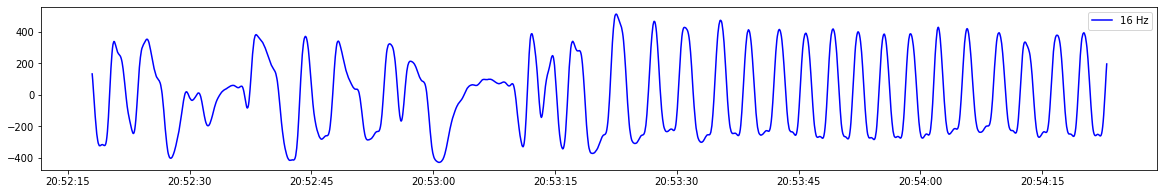

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.plot(resampled_df[0:2000], 'b-', label = '16 Hz')
plt.legend()

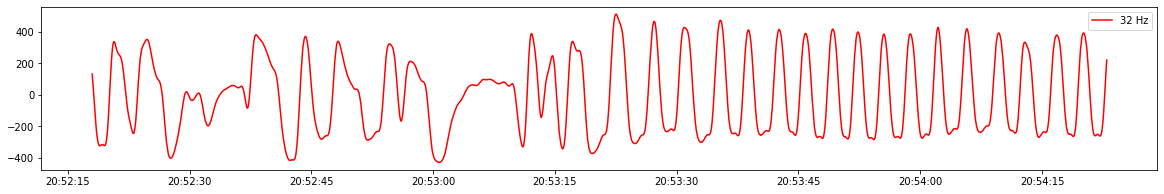

In [43]:
plt.figure(figsize=(20,3))
plt.plot(sample_df[0:4000], 'r-', label = '32 Hz')
plt.legend()